In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

In [2]:
(X_train_0, y_train_0),(X_test_0, y_test_0) = mnist.load_data()
number_of_features = X_train_0.shape[1] * X_train_0.shape[2]
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = np.reshape(X_train_0, (len(X_train_0), number_of_features))
X_test = np.reshape(X_test_0, (len(X_test_0), number_of_features))

y_train = keras.utils.to_categorical(y_train_0)
y_test = keras.utils.to_categorical(y_test_0)


In [5]:
dropout_rate = [0.5,0.4,0.3,0.2,0.1]

def build_model(number_of_features, number_of_unique_outcomes, dropout_rate):
    model = Sequential()

    model.add(Dense(
                    units = 250,
                    activation = 'relu',
                    input_shape = (number_of_features,)))

    for i in range(5):
        model.add(Dense( units = 100,
                         activation='relu'))
        model.add(Dropout(rate = dropout_rate))
    
    model.add(Dense(
                    units = number_of_unique_outcomes,
                    activation = 'softmax'))
    return model
    

DROPOUT RATE:  0.5
10000/10000 [==============================] - 1s 81us/step


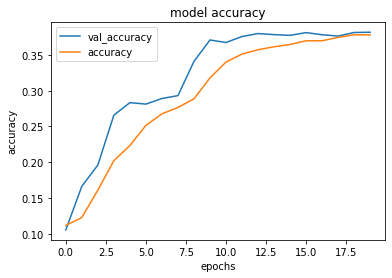

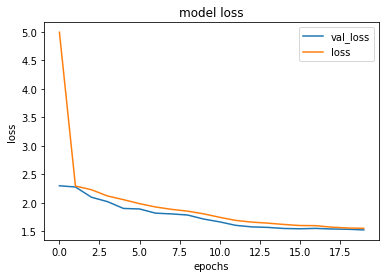

DROPOUT RATE:  0.4
10000/10000 [==============================] - 1s 103us/step


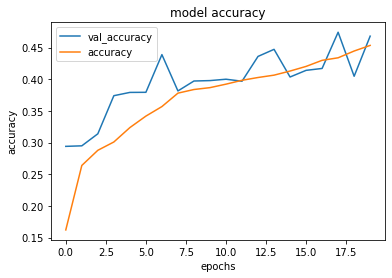

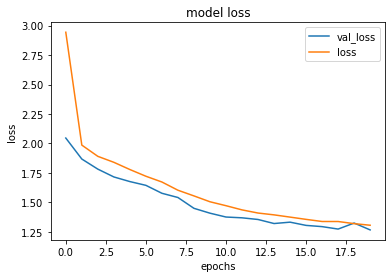

DROPOUT RATE:  0.3
10000/10000 [==============================] - 1s 94us/step


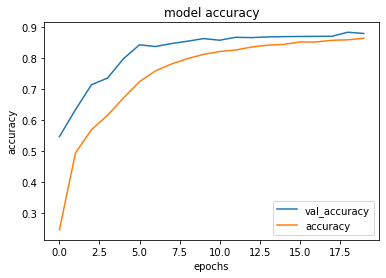

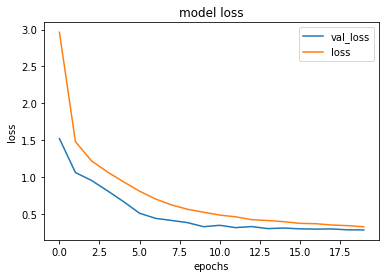

DROPOUT RATE:  0.2
10000/10000 [==============================] - 1s 89us/step


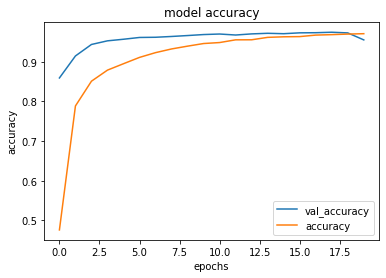

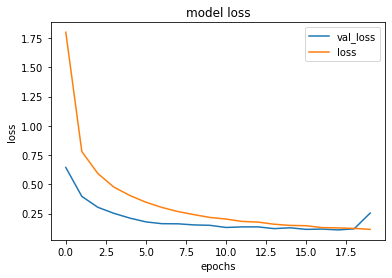

DROPOUT RATE:  0.1
10000/10000 [==============================] - 1s 86us/step


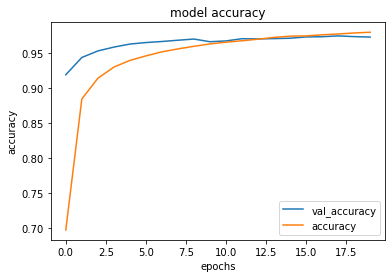

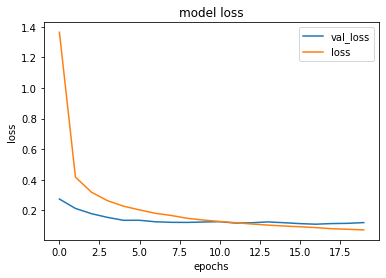

In [9]:
history_list = []
for i in range(len(dropout_rate)):
    model = build_model(number_of_features = number_of_features,
                        number_of_unique_outcomes = number_of_unique_outcomes,
                        dropout_rate=dropout_rate[i])

    print("DROPOUT RATE: ", dropout_rate[i])
    
    model.compile(optimizer = 'sgd',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    history = model.fit(
                        x = X_train,
                        y = y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 0,
                        validation_split=0.1)
    
    loss, accuracy = model.evaluate(x = X_test,
                                    y = y_test)
    
    history_list.append(history)
    
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.xlabel("epochs")
    plt.ylabel('accuracy')
    plt.title('model accuracy')
    plt.legend(['val_accuracy', 'accuracy'])
    plt.show()
    
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.xlabel("epochs")
    plt.ylabel('loss')
    plt.title('model loss')
    plt.legend(['val_loss', 'loss'])
    plt.show()
